# IMPORT LIBRARIES AND DATASET


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [5]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
admission_df.drop('Serial No.', axis=1, inplace=True)
admission_df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university


,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# PERFORM DATA VISUALIZATION

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>, <Axes: >]],
      dtype=object)

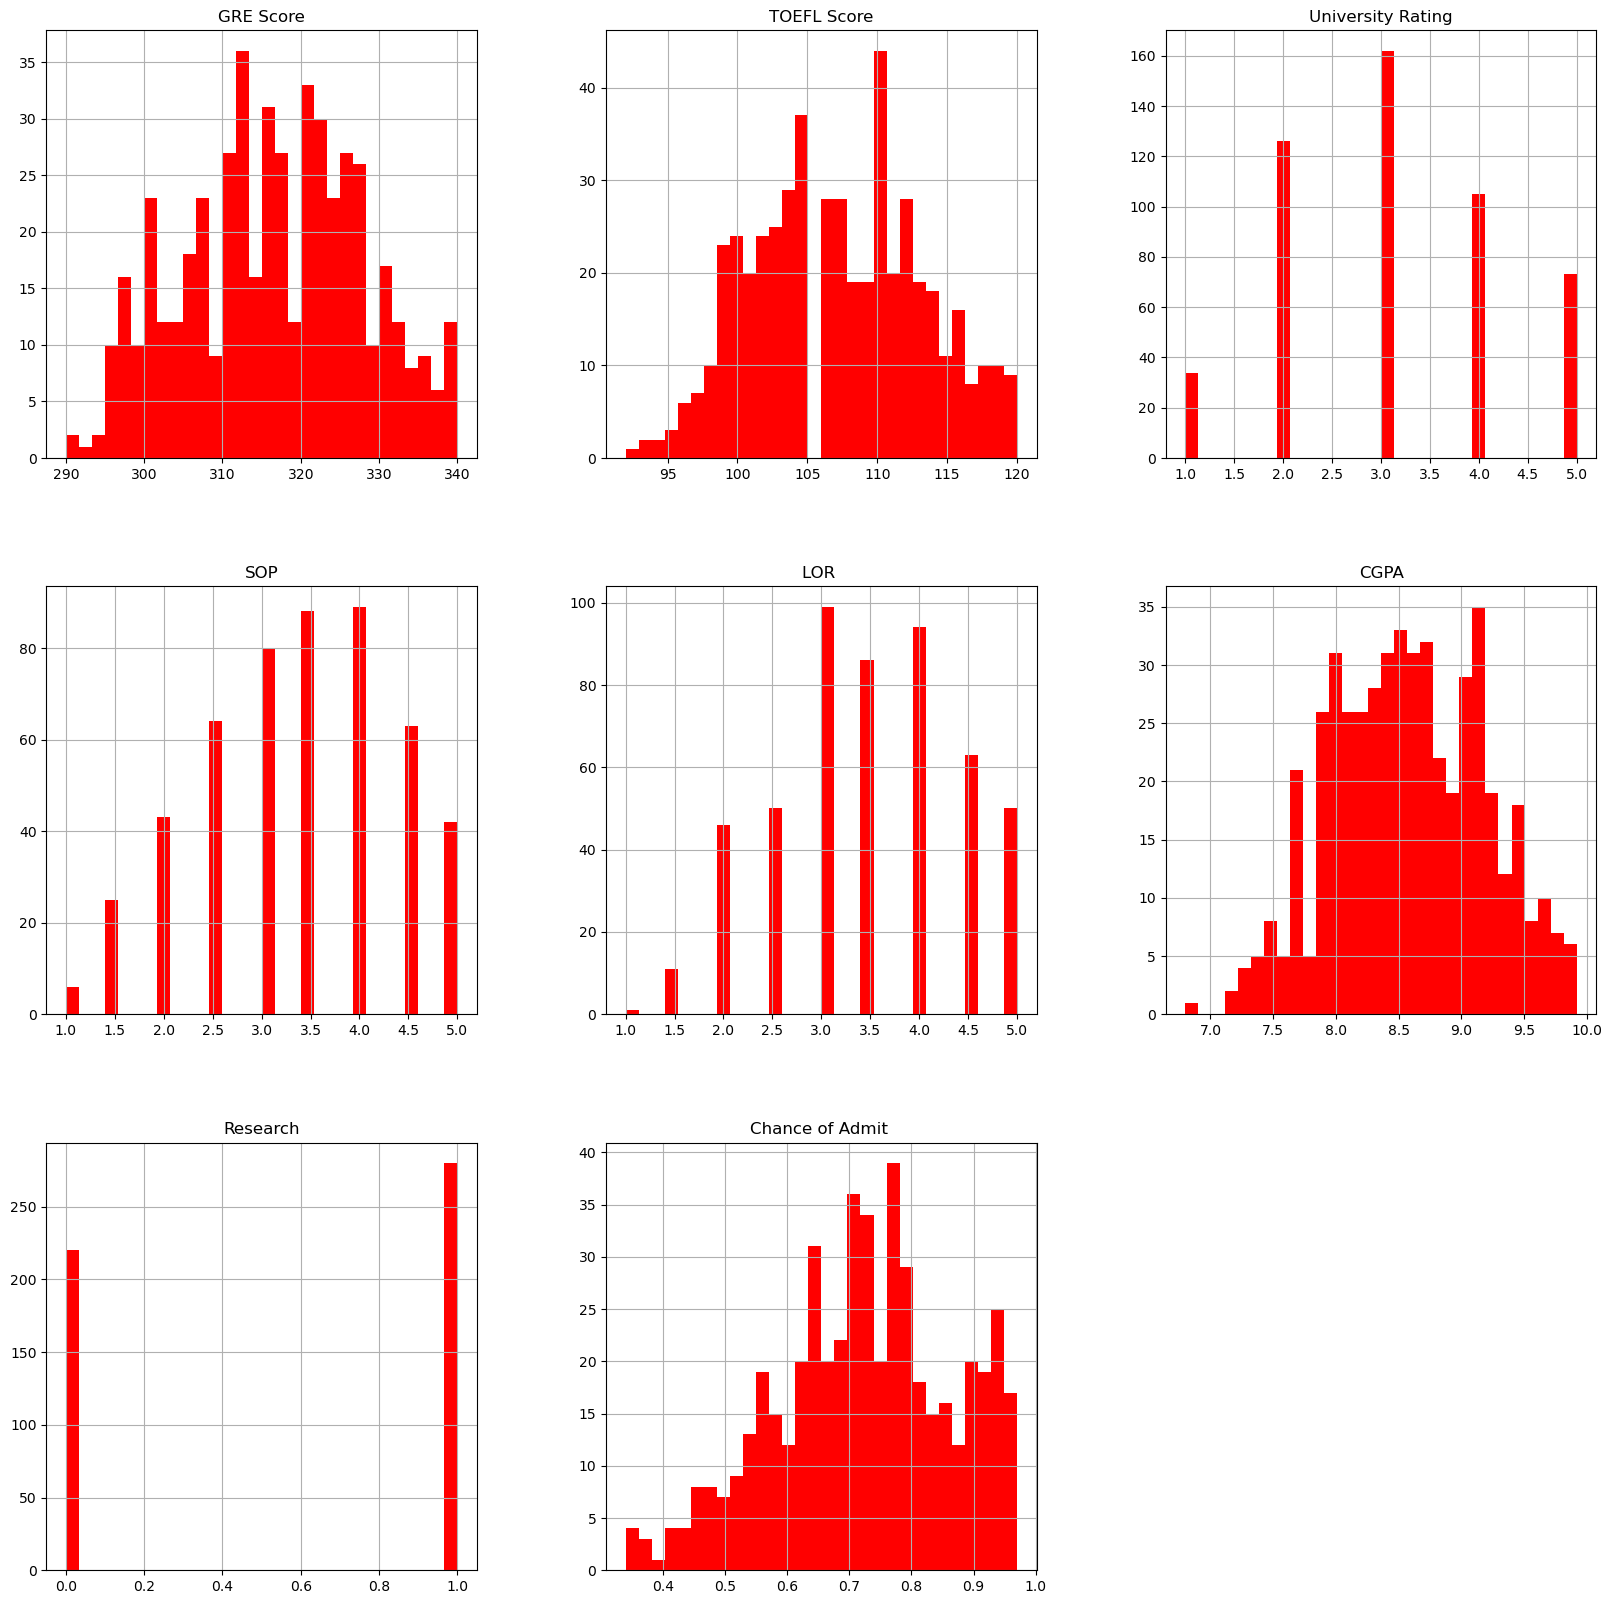

In [11]:
admission_df.hist(bins = 30, figsize = (20, 20), color='r')

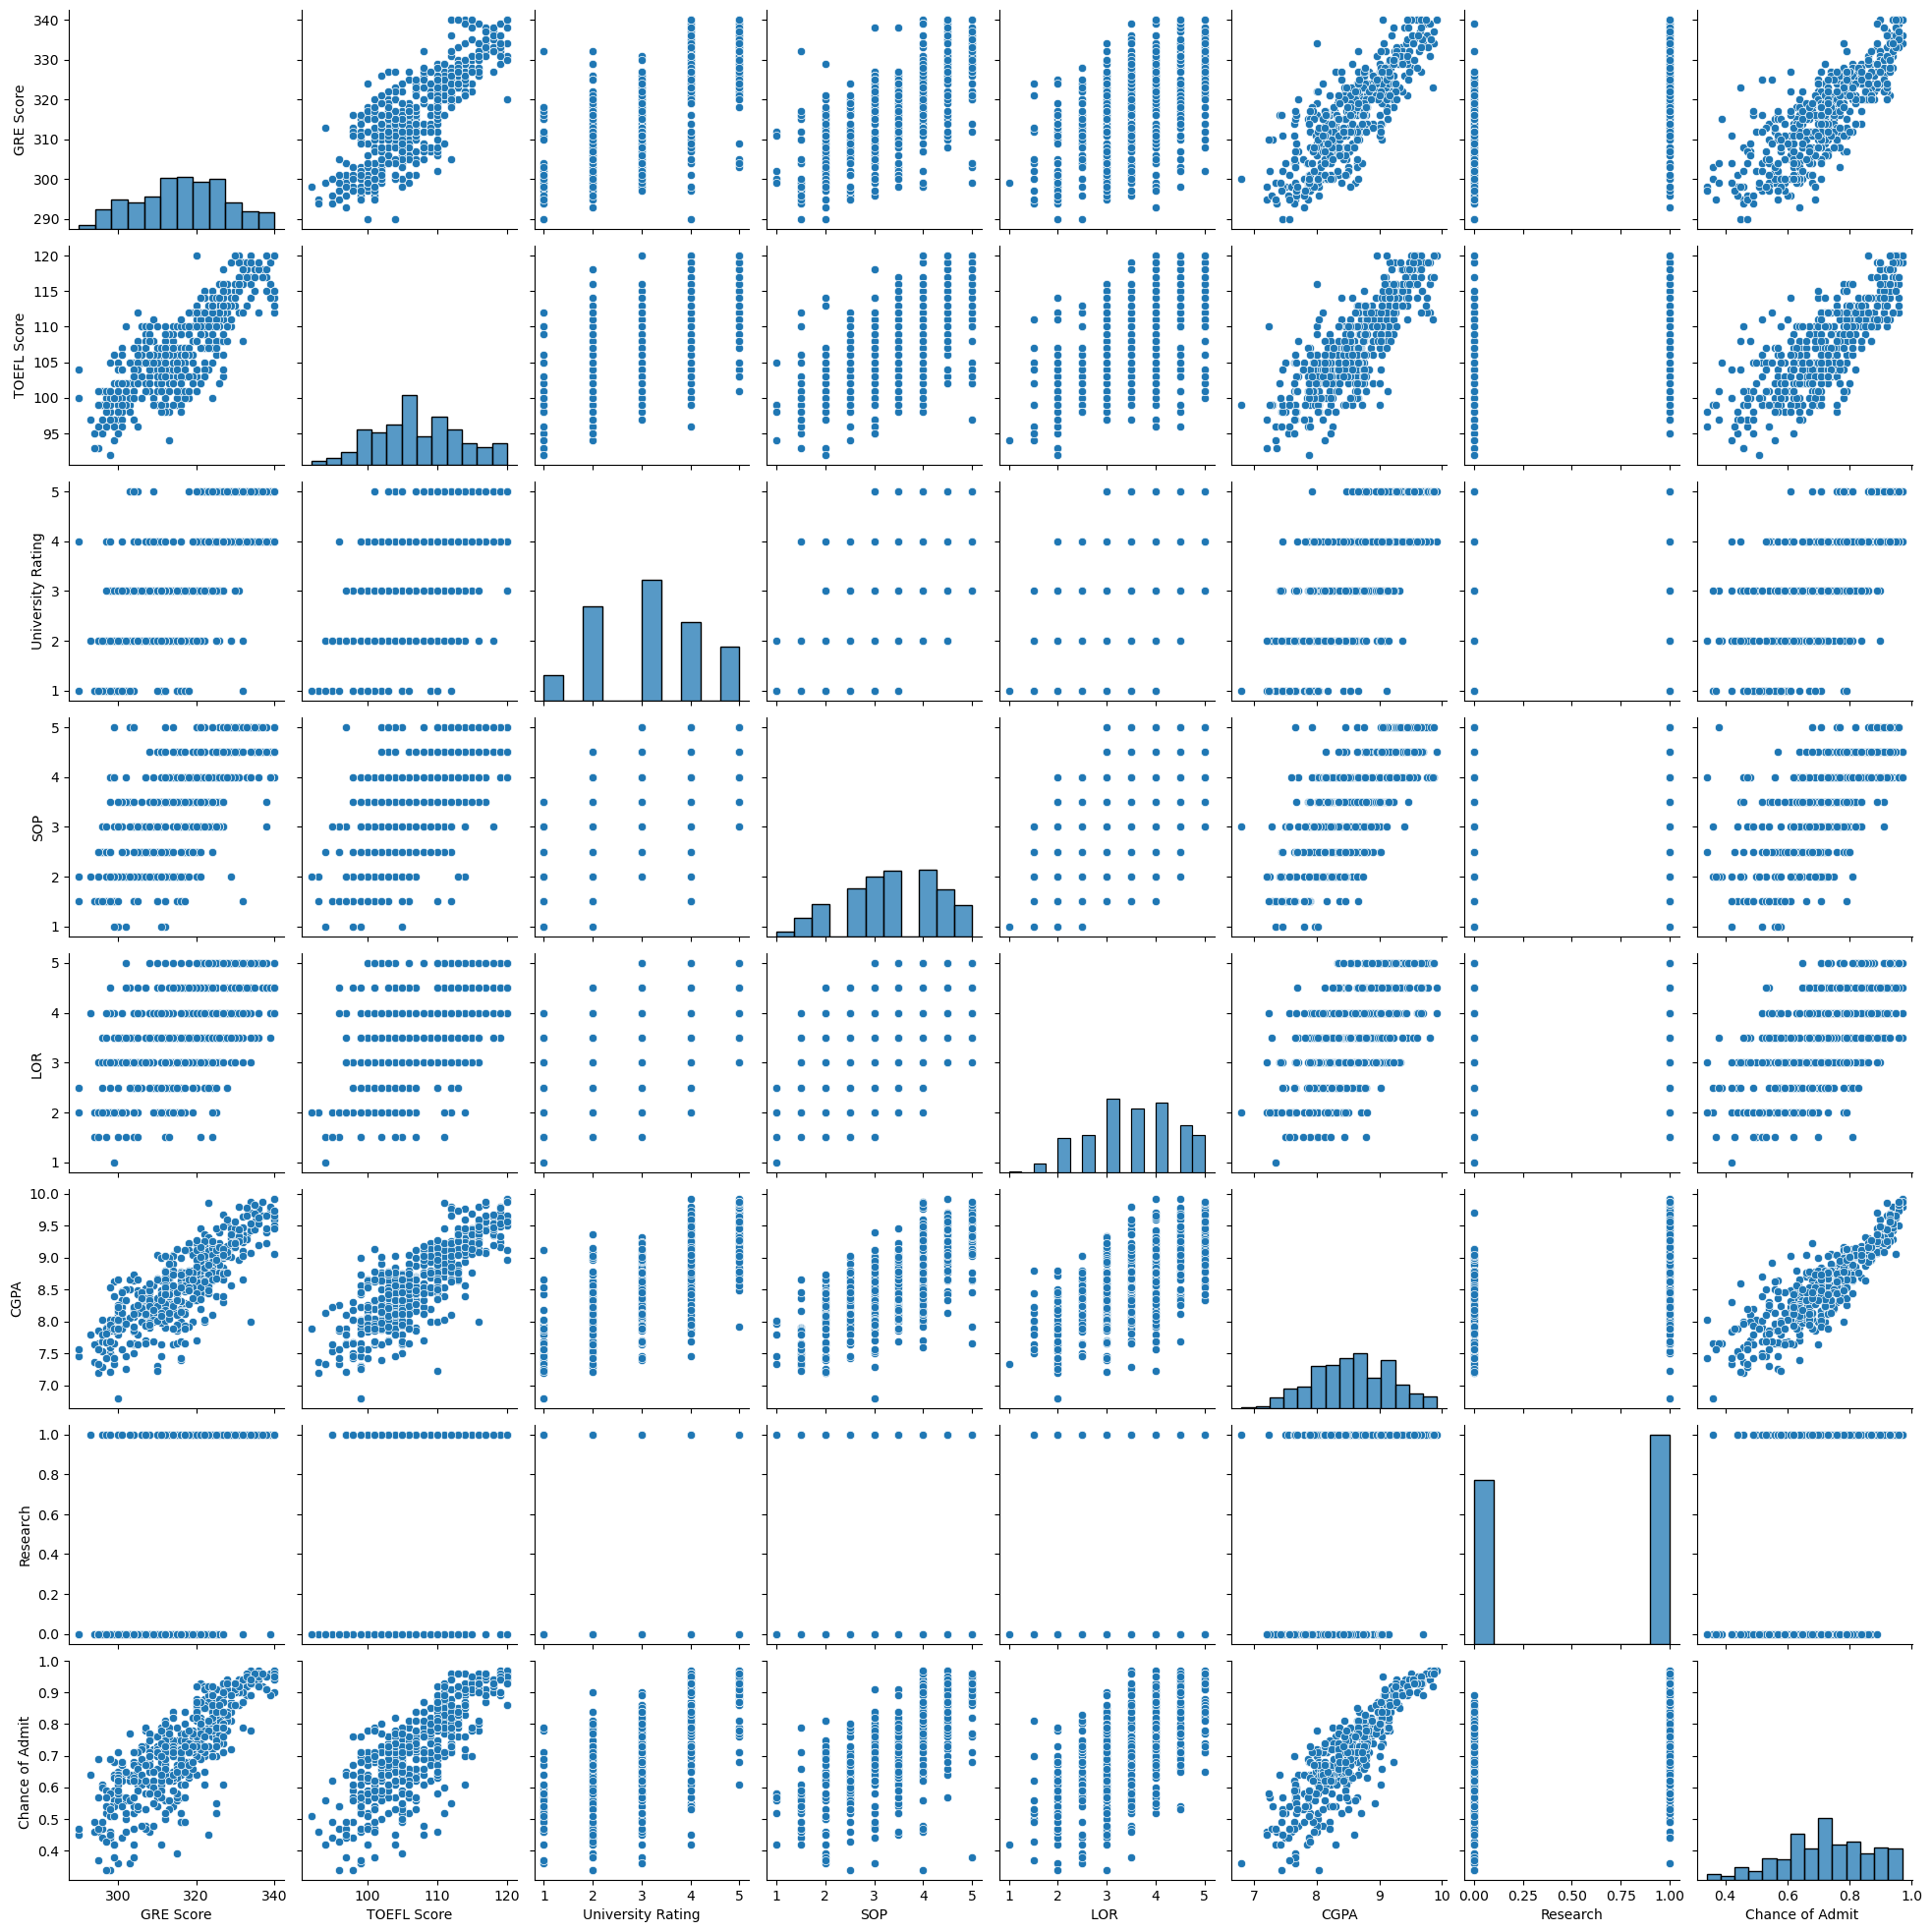

In [12]:
sns.pairplot(admission_df)

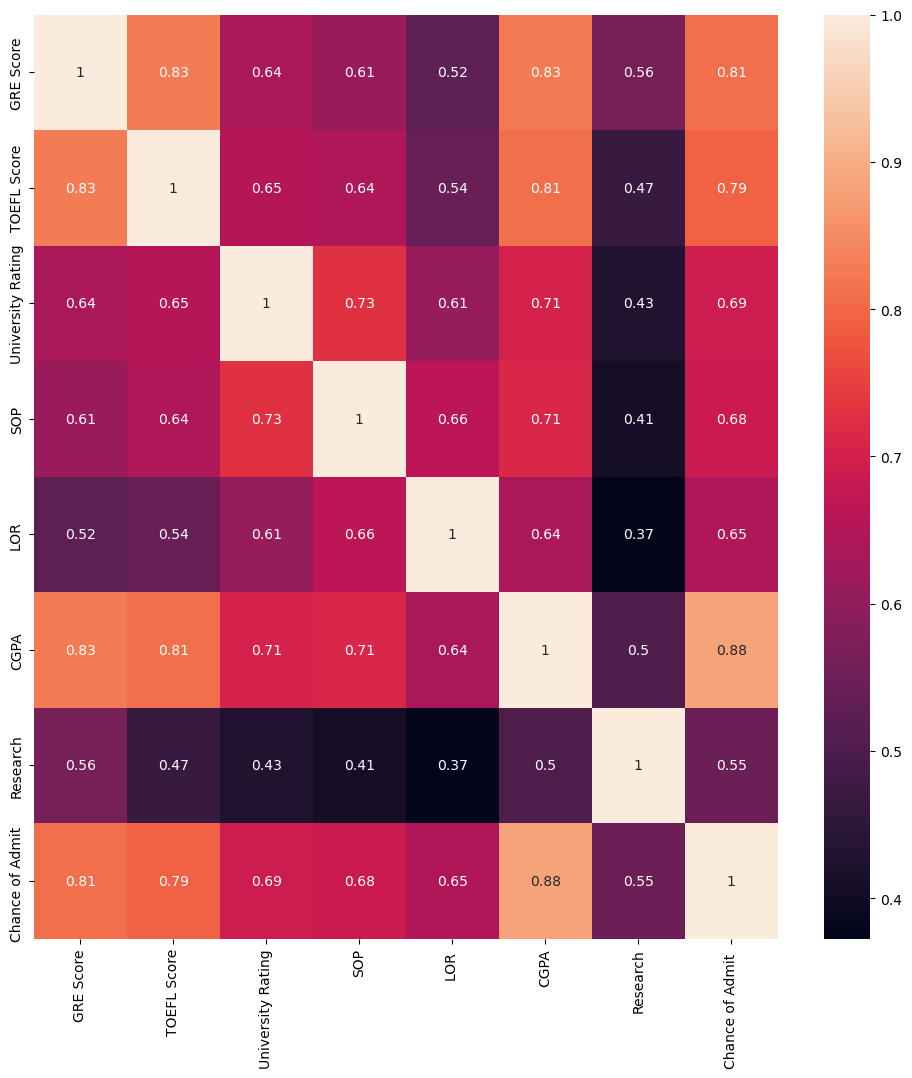

In [13]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# CREATE TRAINING AND TESTING DATASET


In [14]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
X = admission_df.drop(columns=['Chance of Admit '])

In [16]:
y = admission_df['Chance of Admit ']

In [17]:
X.shape

(500, 7)

In [18]:
y.shape

(500,)

In [19]:
X = np.array(X)
y = np.array(y)


In [20]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [21]:
y.shape

(500, 1)

In [22]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [23]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [24]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [26]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [27]:
accuracy_LinearRegression = linear_regression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8399665798207103

# TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [29]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [30]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')



In [31]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)


Epoch 1/100
17/17 [==============================] - 2s 22ms/step - loss: 0.6610 - val_loss: 0.2606
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3784 - val_loss: 0.2273
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3194 - val_loss: 0.1907
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2815 - val_loss: 0.1796
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2999 - val_loss: 0.1796
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2671 - val_loss: 0.1693
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2783 - val_loss: 0.1829
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2797 - val_loss: 0.1727
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2449 - val_loss: 0.1720
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2577 - val_loss: 0.1760
Epoch 11

17/17 [==============================] - 0s 7ms/step - loss: 0.1334 - val_loss: 0.1870
Epoch 84/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1378 - val_loss: 0.1874
Epoch 85/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1340 - val_loss: 0.2102
Epoch 86/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1130 - val_loss: 0.1909
Epoch 87/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1500 - val_loss: 0.1797
Epoch 88/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1337 - val_loss: 0.1837
Epoch 89/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1416 - val_loss: 0.1724
Epoch 90/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1538 - val_loss: 0.1913
Epoch 91/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1307 - val_loss: 0.1935
Epoch 92/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1301 - val_loss: 0.1851
Epoch 93/100


In [32]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))


3/3 [==============================] - 0s 5ms/step - loss: 0.1901
Accuracy : 0.8099102079868317


# save model

In [64]:
# Load the saved model
loaded_model = keras.models.load_model("ann_model.h5")

# Make predictions on new data (X_new should be your new data)
predictions = loaded_model.predict(X_test_new)

# Assuming predictions is a NumPy array, you can convert it to a list
predictions_list = predictions.tolist()

4/4 [==============================] - 0s 3ms/step


In [50]:
# Assuming you have your loaded model and the original dataset (X and y) loaded
# Split the loaded dataset into training and testing subsets
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test subset
predictions = loaded_model.predict(X_test_new)

# Assuming predictions is a NumPy array, you can convert it to a list
predictions_list = predictions.tolist()

4/4 [==============================] - 0s 4ms/step


# testing the new data

In [63]:
# Assuming predictions is a NumPy array of admission chances
categories = []

for prediction in predictions:
    admission_chance_percent = round(max(0, min(prediction[0] * 100, 100)), 2)  # Clip values to [0%, 100%]
    
    if admission_chance_percent >= 90:
        category = "Highest Chance"
    elif 70 <= admission_chance_percent < 90:
        category = "High Chance"
    elif 50 <= admission_chance_percent < 70:
        category = "Moderate Chance"
    elif 30 <= admission_chance_percent < 50:
        category = "Low Chance"
    else:
        category = "Very Low Chance"
    
    categories.append(category)

for i, category in enumerate(categories):
    admission_chance_percent = round(max(0, min(predictions[i][0] * 100, 100)), 2)
    print(f"Student {i+1}: Predicted Admission Chance: {admission_chance_percent}%, Category: {category}")

Student 1: Predicted Admission Chance: 100%, Category: Highest Chance
Student 2: Predicted Admission Chance: 25.06%, Category: Very Low Chance
Student 3: Predicted Admission Chance: 0%, Category: Very Low Chance
Student 4: Predicted Admission Chance: 12.01%, Category: Very Low Chance
Student 5: Predicted Admission Chance: 51.36%, Category: Moderate Chance
Student 6: Predicted Admission Chance: 87.23%, Category: High Chance
Student 7: Predicted Admission Chance: 0%, Category: Very Low Chance
Student 8: Predicted Admission Chance: 0%, Category: Very Low Chance
Student 9: Predicted Admission Chance: 28.84%, Category: Very Low Chance
Student 10: Predicted Admission Chance: 57.03%, Category: Moderate Chance
Student 11: Predicted Admission Chance: 0%, Category: Very Low Chance
Student 12: Predicted Admission Chance: 0%, Category: Very Low Chance
Student 13: Predicted Admission Chance: 0%, Category: Very Low Chance
Student 14: Predicted Admission Chance: 100%, Category: Highest Chance
Student

In [34]:
epochs_hist.history.keys()


dict_keys(['loss', 'val_loss'])

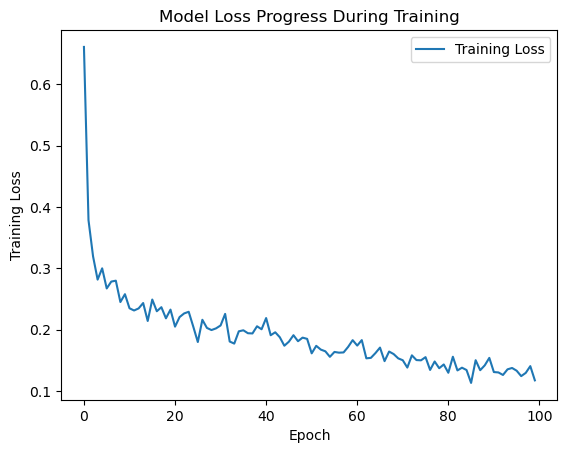

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [36]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_decisionTree

0.6312653801321072

In [38]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(X_train, y_train)

C:\Users\anshu\AppData\Local\Temp\ipykernel_59344\579745192.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [39]:
accuracy_randomforest = randomForest_model.score(X_test, y_test)
accuracy_randomforest

0.8082591266312186

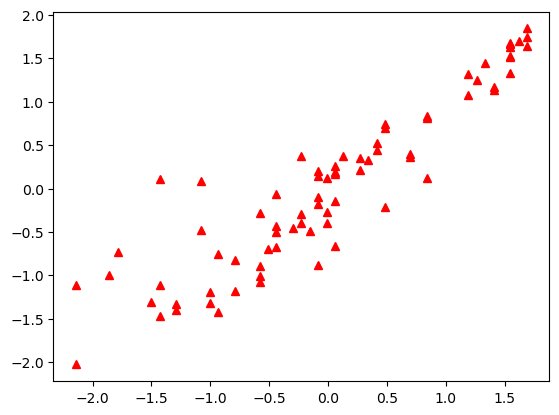

In [40]:
y_pred = linear_regression_model.predict(X_test)
plt.plot(y_test, y_pred, '^', color='r')

In [41]:
y_predict_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

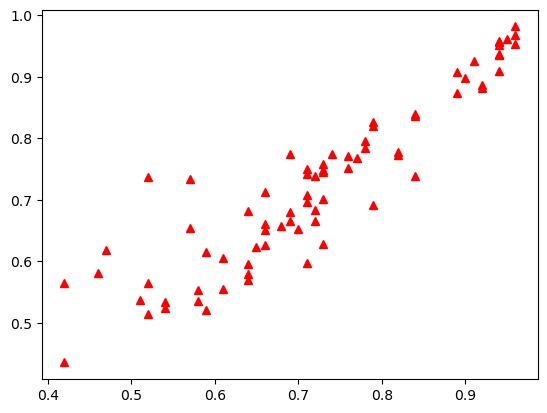

In [42]:
plt.plot(y_test_orig, y_predict_orig, '^', color='r')


In [43]:
k = X_test.shape[1]
n = len(X_test)
n



75

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.057 
MSE = 0.0032949814325447893 
MAE = 0.039179723750171425 
R2 = 0.8399665798207103 
Adjusted R2 = 0.8232466702497397


In [45]:
import pickle

In [46]:
s = np.array([320, 110, 1, 5, 5, 9, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(7,)
(1, 7)


In [47]:
pickle.dump(linear_regression_model, open('linear_regression_model_sc.pkl', 'wb'))

In [48]:
model = pickle.load(open('linear_regression_model_sc.pkl', 'rb'))
print(model.predict(s))

[[71.90896366]]
